In [65]:
import numpy as np
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
# import fortranfile as ff
from os import listdir

import sys
sys.path.append("../")

import galomatch

%load_ext autoreload
%autoreload 2

from copy import copy

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70.5, Om0=0.307, Tcmb0=2.728)


def convert_units(arr):
    galomatch.io.convert_mass_cols(arr, "mass_cl")
    galomatch.io.convert_position_cols(arr, ["peak_x", "peak_y", "peak_z"])
    galomatch.io.flip_cols(arr, "peak_x", "peak_z")
    dist, ra, dec = galomatch.utils.cartesian_to_radec(arr)

    arr = galomatch.utils.add_columns(arr, [dist, ra, dec], ["dist", "ra", "dec"])
    return arr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
srcdir = "/users/hdesmond/Mmain"
sim = galomatch.io.read_mmain(9844, srcdir)


sim = convert_units(sim)

import astropy.units as u
from astropy.coordinates import SkyCoord

In [146]:
c1 = SkyCoord(ra=obs["RA"]*u.degree, dec=obs["DEC"]*u.degree, distance=obs["COMDIST"]*u.Mpc)
c2 = SkyCoord(ra=sim["ra"]*u.degree, dec=sim["dec"]*u.degree, distance=sim["dist"]*u.Mpc)

In [164]:
sep, indxs = galomatch.match.brute_separation(c1, c2, N=100, angular=True)

<IPython.core.display.Javascript object>


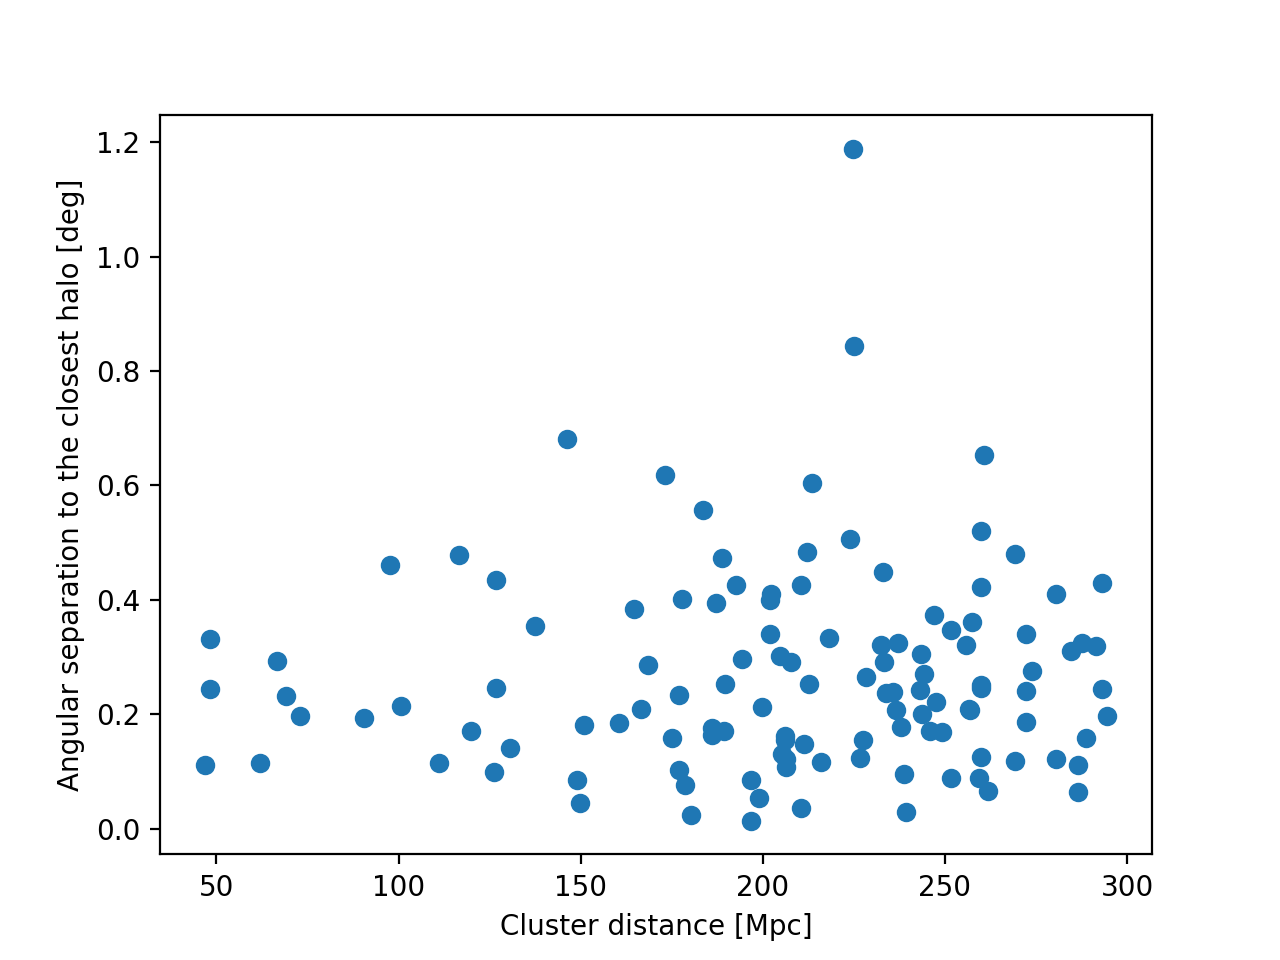

In [167]:
plt.figure()

plt.scatter(obs["COMDIST"], sep[:, 0])

plt.xlabel("Cluster distance [Mpc]")
plt.ylabel("Angular separation to the closest halo [deg]")

plt.savefig("../plots/separation.png", dpi=450)
plt.show()


<IPython.core.display.Javascript object>


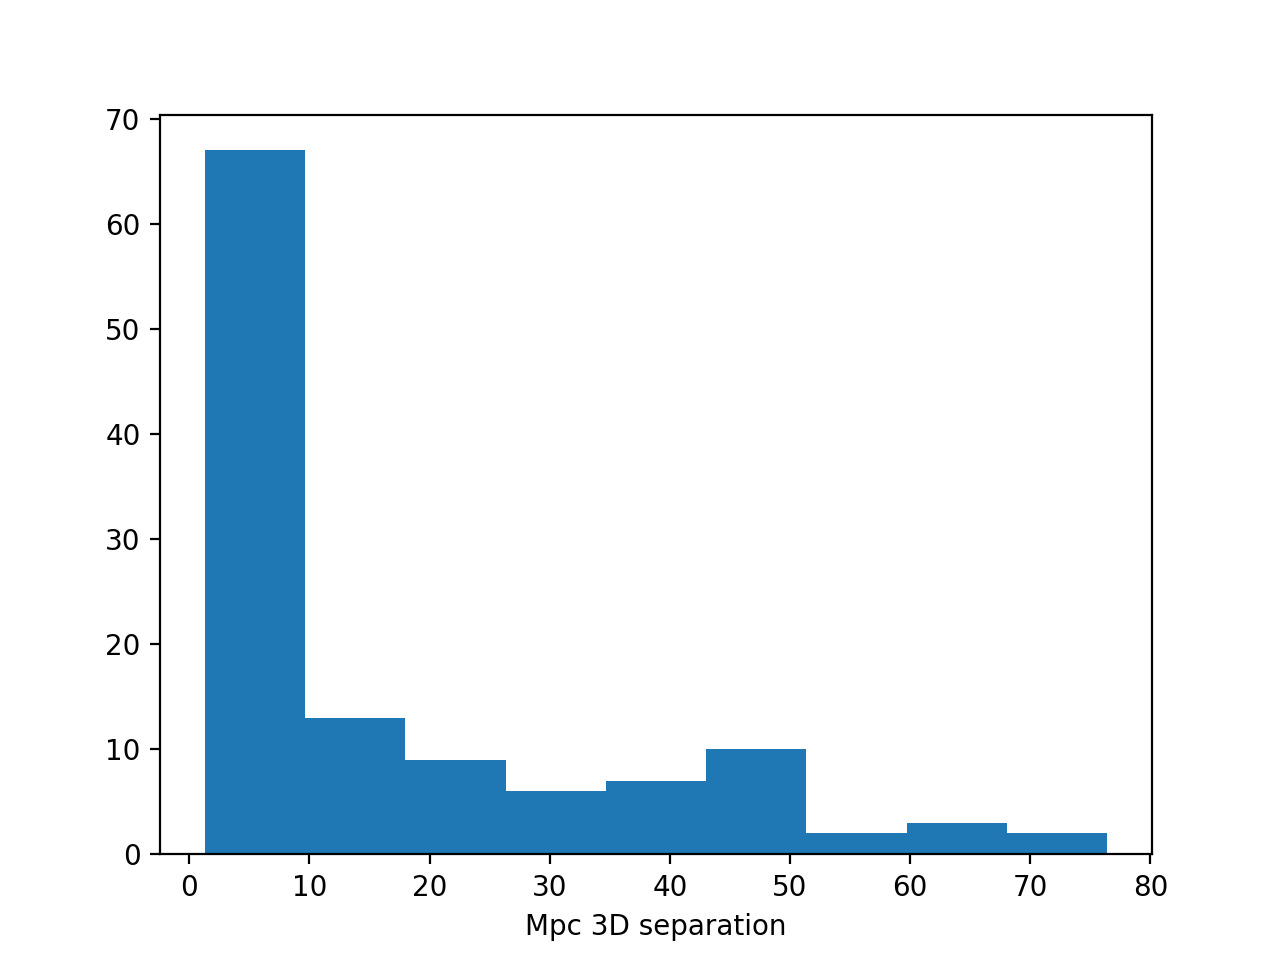

In [141]:
plt.figure()
plt.hist(out[:, 0], bins="auto")
plt.xlabel("Mpc 3D separation")
plt.show()

In [103]:
c1.separation_3d

In [117]:
c1[0].separation_3d(c2)

<Distance [222682.11879245, 153514.55167621, 159336.33634698, ...,
           605853.4146343 , 232533.88204318, 228634.73088574] kpc>

In [68]:
fpath = "/mnt/zfsusers/rstiskalek/galomatch/data/HFI_PCCS_SZ-union_R2.08.fits"

In [69]:
obs = galomatch.io.read_planck2015(fpath, cosmo, 300)

In [77]:
obs["DEC"].max()

78.63246891189102

In [70]:
m = sim["mass_cl"] > 5e14

<IPython.core.display.Javascript object>


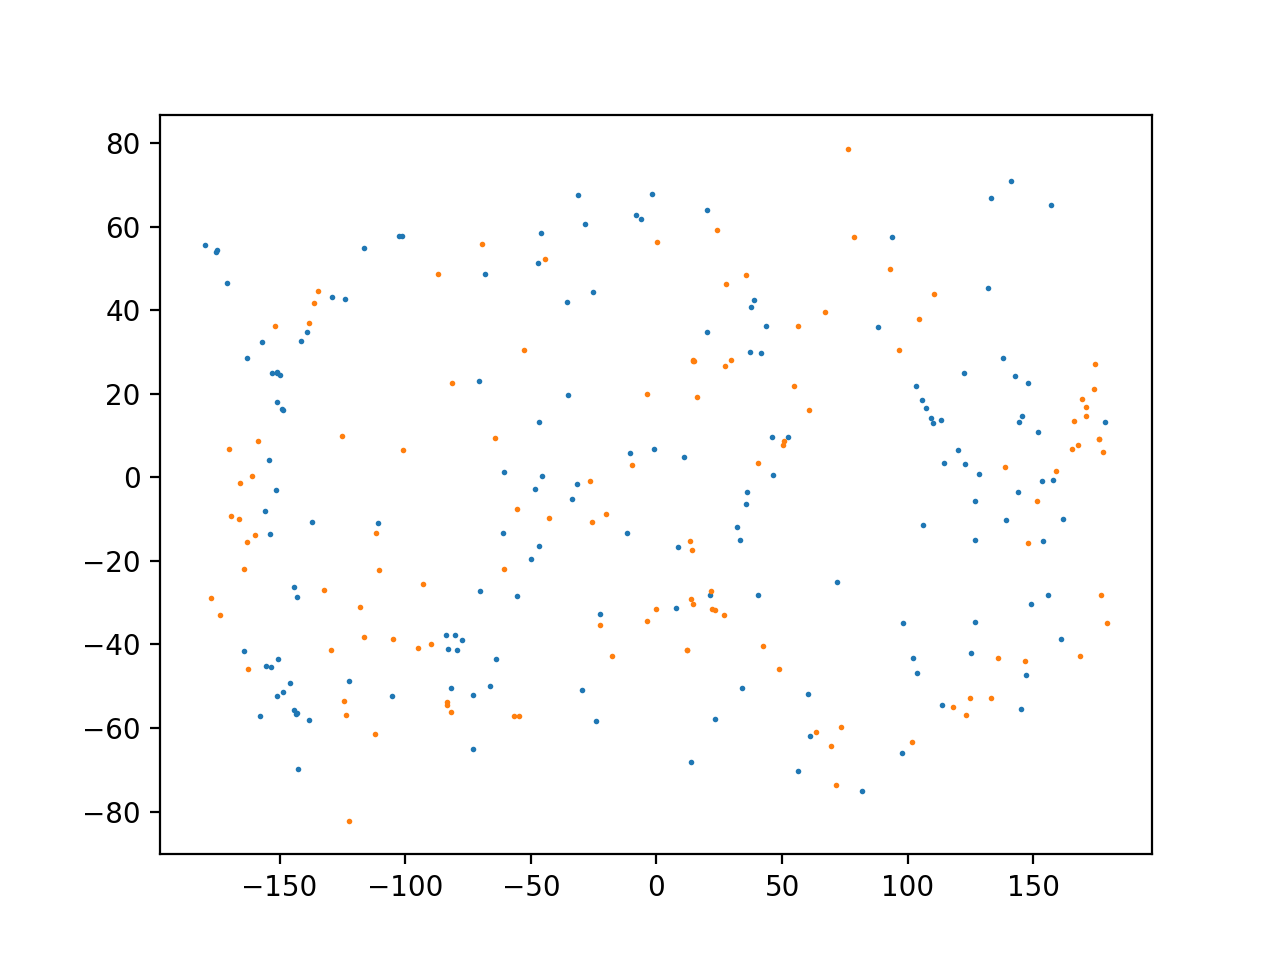

In [71]:
plt.figure()

plt.scatter(sim["ra"][m], sim["dec"][m], s=1)
plt.scatter(obs["RA"], obs["DEC"], s=1)
# plt.yscale("log")
# plt.xscale()

plt.show()

In [ ]:
    dtype = arr.dtype.descr
    for i, col in enumerate(cols):
        dtype.append((col, X[i, :].dtype.descr[0][1]))

In [27]:
np.full(100, np.nan, dtype=obs.dtype.descr).dtype.names

('INDEX',
 'NAME',
 'GLON',
 'GLAT',
 'RA',
 'DEC',
 'POS_ERR',
 'SNR',
 'PIPELINE',
 'PIPE_DET',
 'PCCS2',
 'PSZ',
 'IR_FLAG',
 'Q_NEURAL',
 'Y5R500',
 'Y5R500_ERR',
 'VALIDATION',
 'REDSHIFT_ID',
 'REDSHIFT',
 'MSZ',
 'MSZ_ERR_UP',
 'MSZ_ERR_LOW',
 'MCXC',
 'REDMAPPER',
 'ACT',
 'SPT',
 'WISE_FLAG',
 'AMI_EVIDENCE',
 'COSMO',
 'COMMENT')

In [ ]:
M = np.log10(1e14 * obs["MSZ"])

In [ ]:
m = np.isfinite(M)


plt.figure()
plt.scatter(z[m], M[m])
plt.xlabel("Comoving distance [Mpc]")
plt.ylabel("log M500")

plt.savefig("../plots/clusters.png", dpi=450)

plt.show()

In [ ]:
from astropy.io import fits

In [ ]:
fits.FITS_rec

In [ ]:
srcdir = "/users/hdesmond/Mmain"
sim = read_mmain(9844, srcdir)
# sim = convert_units(sim)

def convert_units(arr):
    galomatch.io.convert_mass_cols(arr, "mass_cl")
    galomatch.io.convert_position_cols(arr, ["peak_x", "peak_y", "peak_z"])
    galomatch.io.flip_cols(arr, "peak_x", "peak_z")
    dist, ra, dec = galomatch.utils.cartesian_to_radec(arr)

    arr = galomatch.utils.add_columns(arr, [dist, ra, dec], ["dist", "ra", "dec"])
    return arr

In [ ]:
simpath = galomatch.io.get_sim_path(9844)

In [ ]:
sim = read_mmain(9844, srcdir)
sim = convert_units(sim)

In [ ]:
obs.dtype.names

$180^\degree$

In [ ]:
plt.figure()
m = sim["mass_cl"] > 5e13
plt.scatter(sim["ra"][m], sim["dec"][m], c=np.log10(sim["mass_cl"][m]), s=3)
plt.colorbar()

plt.scatter(obs["RA"], obs["DEC"], s=2, c="red")

plt.xlabel("RA")
plt.ylabel("dec")
plt.savefig("../plots/clusters_overlaid.png", dpi=450)
plt.show()

In [ ]:
plt.figure()
# plt.scatter(arr["peak_x"], arr["peak_y"], s=0.00001)

plt.hist(np.log10(arr["mass_cl"]), bins="auto")

plt.show()